# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [2]:
# load messages dataset
messages = pd.read_csv('data/messages.csv',dtype=str)
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [3]:
# load categories dataset
categories = pd.read_csv('data/categories.csv',dtype=str)
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [4]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        26248 non-null  object
 1   message   26248 non-null  object
 2   original  10184 non-null  object
 3   genre     26248 non-null  object
dtypes: object(4)
memory usage: 820.4+ KB


In [5]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          26248 non-null  object
 1   categories  26248 non-null  object
dtypes: object(2)
memory usage: 410.2+ KB


In [6]:
# merge datasets
df = pd.merge(left=messages,right=categories,how='inner',on=['id'])

df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [7]:
# create a dataframe of the 36 individual category columns
categories = df['categories'].str.split(pat=';',expand=True)
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [8]:
categories[:1]

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [9]:
# select the first row of the categories dataframe
row = categories[:1]

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
extract_list = lambda x:x[0][:-2]
category_colnames = row.apply(extract_list).tolist()
print(category_colnames)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [10]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [11]:
for column in categories:
    # set each value to be the last character of the string
    categories[column] = categories[column].apply(lambda x: x[-1])
    
    # convert column from string to numeric
    categories[column] = categories[column].astype(int)
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# check if there are values other than 0 and 1 in categories
l = []
for col in categories.columns:
    l.append(categories[col].unique())

In [13]:
l[:5]

[array([1, 0, 2]), array([0, 1]), array([0, 1]), array([0, 1]), array([0, 1])]

In [14]:
# If there are values other than 0 or 1 in categories' columns, replace the other values as 1
for col in categories.columns:
    categories.loc[(categories[col]!=1)&(categories[col]!=0)] = 1

In [15]:
categories['related'].unique()

array([1, 0])

### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [16]:
# drop the original categories column from `df`
df = df.drop(['categories'],axis=1)

df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [17]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df,categories],axis=1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26386 entries, 0 to 26385
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      26386 non-null  object
 1   message                 26386 non-null  object
 2   original                10246 non-null  object
 3   genre                   26386 non-null  object
 4   related                 26386 non-null  int32 
 5   request                 26386 non-null  int32 
 6   offer                   26386 non-null  int32 
 7   aid_related             26386 non-null  int32 
 8   medical_help            26386 non-null  int32 
 9   medical_products        26386 non-null  int32 
 10  search_and_rescue       26386 non-null  int32 
 11  security                26386 non-null  int32 
 12  military                26386 non-null  int32 
 13  child_alone             26386 non-null  int32 
 14  water                   26386 non-null  int32 
 15  fo

In [19]:
# check number of duplicates
df.duplicated().sum()

170

In [20]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [21]:
# check number of duplicates
df.duplicated().sum()

0

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [22]:
engine = create_engine('sqlite:///DisasterRespond.db')
df.to_sql('cleaned_data', engine, index=False)

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.

In [23]:
genre_counts = df.groupby('genre').count()['message']
genre_counts    

genre
direct    10766
news      13054
social     2396
Name: message, dtype: int64

In [24]:
genre_names = list(genre_counts.index)

In [25]:
genre_names

['direct', 'news', 'social']

In [26]:
res_df = df.drop(columns=['id', 'message', 'original', 'genre'])
res_count = res_df.sum().sort_values(ascending=False)[:10]

In [27]:
res_count 

related            20094
aid_related        11048
weather_related     7485
direct_report       5263
request             4662
other_aid           3634
food                3111
earthquake          2643
storm               2631
shelter             2502
dtype: int64

In [28]:
res_categories = res_count.index
res_categories 

Index(['related', 'aid_related', 'weather_related', 'direct_report', 'request',
       'other_aid', 'food', 'earthquake', 'storm', 'shelter'],
      dtype='object')

In [30]:
coln_labels = df.drop(columns=['id', 'message', 'original', 'genre']).sum().sort_values(ascending=False).index

df_genre_grps = df.groupby('genre')[coln_labels].sum().reset_index()
df_genre_grps

,genre,related,aid_related,weather_related,direct_report,request,other_aid,food,earthquake,storm,...,security,clothing,aid_centers,missing_people,hospitals,fire,tools,shops,offer,child_alone
0,direct,7314,4470,1653,3745,3828,1707,1939,928,447,...,263,379,210,218,186,173,165,165,178,132
1,news,10689,5878,4298,870,622,1581,1025,928,1463,...,310,153,236,183,220,243,132,86,83,18
2,social,2091,700,1534,648,212,346,147,787,721,...,86,61,51,85,65,54,50,57,45,38


In [32]:
df_genre_grps = df_genre_grps.drop(columns=['genre']).rename(index={0 : 'direct', 1:'news', 2:'social'})

In [33]:
df_genre_grps

,related,aid_related,weather_related,direct_report,request,other_aid,food,earthquake,storm,shelter,...,security,clothing,aid_centers,missing_people,hospitals,fire,tools,shops,offer,child_alone
direct,7314,4470,1653,3745,3828,1707,1939,928,447,1284,...,263,379,210,218,186,173,165,165,178,132
news,10689,5878,4298,870,622,1581,1025,928,1463,1131,...,310,153,236,183,220,243,132,86,83,18
social,2091,700,1534,648,212,346,147,787,721,87,...,86,61,51,85,65,54,50,57,45,38


In [34]:
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
import seaborn as sns

In [44]:
df_genre_grps.index

Index(['direct', 'news', 'social'], dtype='object')

<AxesSubplot:ylabel='message'>

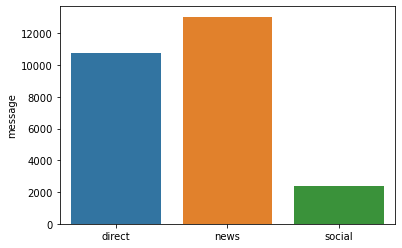

In [52]:
sns.barplot( x = genre_names, y=genre_counts, data = df_genre_grps )

In [60]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
category_name = df.columns[4:].tolist()
category_name

['related',
 'request',
 'offer',
 'aid_related',
 'medical_help',
 'medical_products',
 'search_and_rescue',
 'security',
 'military',
 'child_alone',
 'water',
 'food',
 'shelter',
 'clothing',
 'money',
 'missing_people',
 'refugees',
 'death',
 'other_aid',
 'infrastructure_related',
 'transport',
 'buildings',
 'electricity',
 'tools',
 'hospitals',
 'shops',
 'aid_centers',
 'other_infrastructure',
 'weather_related',
 'floods',
 'storm',
 'fire',
 'earthquake',
 'cold',
 'other_weather',
 'direct_report']

In [70]:
ct = df[ df.columns[4:]].sum().sort_values(ascending=False)
ct 

related                   20094
aid_related               11048
weather_related            7485
direct_report              5263
request                    4662
other_aid                  3634
food                       3111
earthquake                 2643
storm                      2631
shelter                    2502
floods                     2343
medical_help               2272
infrastructure_related     1893
water                      1860
other_weather              1564
buildings                  1521
medical_products           1501
transport                  1389
death                      1382
other_infrastructure       1339
refugees                   1063
military                   1048
search_and_rescue           912
money                       792
electricity                 720
cold                        718
security                    659
clothing                    593
aid_centers                 497
missing_people              486
hospitals                   471
fire    

In [77]:
ct_name = ct.index.values

In [78]:
ct_name

array(['related', 'aid_related', 'weather_related', 'direct_report',
       'request', 'other_aid', 'food', 'earthquake', 'storm', 'shelter',
       'floods', 'medical_help', 'infrastructure_related', 'water',
       'other_weather', 'buildings', 'medical_products', 'transport',
       'death', 'other_infrastructure', 'refugees', 'military',
       'search_and_rescue', 'money', 'electricity', 'cold', 'security',
       'clothing', 'aid_centers', 'missing_people', 'hospitals', 'fire',
       'tools', 'shops', 'offer', 'child_alone'], dtype=object)

In [73]:
ct.values

array([20094, 11048,  7485,  5263,  4662,  3634,  3111,  2643,  2631,
        2502,  2343,  2272,  1893,  1860,  1564,  1521,  1501,  1389,
        1382,  1339,  1063,  1048,   912,   792,   720,   718,   659,
         593,   497,   486,   471,   470,   347,   308,   306,   188],
      dtype=int64)

<AxesSubplot:>

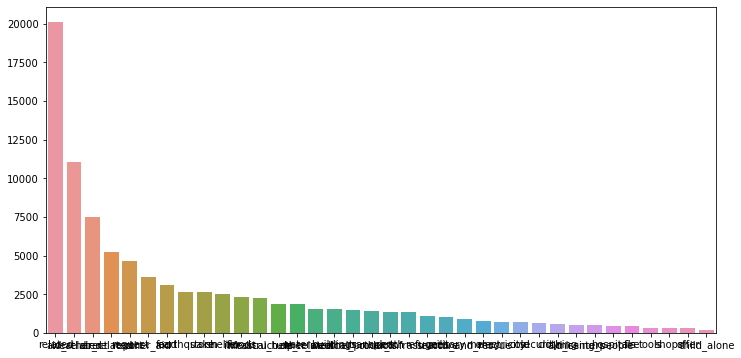

In [81]:
fig= plt.figure(figsize = (12,6))
sns.barplot(x = ct_name, y =ct.values)